# Q-1

-Load the houseprices data from Kaggle

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

pd.options.display.max_columns = None

In [2]:
housePrices = pd.read_csv("house_train.csv")
housePrices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housePrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
for col in housePrices.columns:
    print(housePrices[col].name,":",sum(pd.isnull(housePrices[col])))

Id : 0
MSSubClass : 0
MSZoning : 0
LotFrontage : 259
LotArea : 0
Street : 0
Alley : 1369
LotShape : 0
LandContour : 0
Utilities : 0
LotConfig : 0
LandSlope : 0
Neighborhood : 0
Condition1 : 0
Condition2 : 0
BldgType : 0
HouseStyle : 0
OverallQual : 0
OverallCond : 0
YearBuilt : 0
YearRemodAdd : 0
RoofStyle : 0
RoofMatl : 0
Exterior1st : 0
Exterior2nd : 0
MasVnrType : 8
MasVnrArea : 8
ExterQual : 0
ExterCond : 0
Foundation : 0
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinSF1 : 0
BsmtFinType2 : 38
BsmtFinSF2 : 0
BsmtUnfSF : 0
TotalBsmtSF : 0
Heating : 0
HeatingQC : 0
CentralAir : 0
Electrical : 1
1stFlrSF : 0
2ndFlrSF : 0
LowQualFinSF : 0
GrLivArea : 0
BsmtFullBath : 0
BsmtHalfBath : 0
FullBath : 0
HalfBath : 0
BedroomAbvGr : 0
KitchenAbvGr : 0
KitchenQual : 0
TotRmsAbvGrd : 0
Functional : 0
Fireplaces : 0
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageCars : 0
GarageArea : 0
GarageQual : 81
GarageCond : 81
PavedDrive : 0
WoodDeckSF :

In [5]:
housePrices.drop(['PoolQC', "Fence", "MiscFeature","FireplaceQu","Alley","LotFrontage"],axis=1,inplace=True)

In [6]:
housePrices["GarageYrBlt"].fillna(housePrices["GarageYrBlt"].mode()[0],inplace=True)
housePrices["GarageCond"].fillna(housePrices["GarageCond"].mode()[0],inplace=True)
housePrices["GarageFinish"].fillna(housePrices["GarageFinish"].mode()[0],inplace=True)
housePrices["GarageArea"].fillna(housePrices["GarageArea"].mode()[0],inplace=True)
housePrices["GarageQual"].fillna(housePrices["GarageQual"].mode()[0],inplace=True)
housePrices["GarageCars"].fillna(housePrices["GarageCars"].mode()[0],inplace=True)
housePrices["GarageType"].fillna(housePrices["GarageType"].mode()[0],inplace=True)

housePrices.dropna(inplace=True)

In [7]:
housePrices["central_air"]=pd.get_dummies(housePrices["CentralAir"], drop_first=True)

In [8]:
def heatingquc(HeatingQC):
    if HeatingQC=="Ex":
        return 5
    elif HeatingQC=="Gd":
        return 4
    elif HeatingQC=="TA":
        return 3
    elif HeatingQC=="Fa":
        return 2
    elif HeatingQC=="Po":
        return 1


housePrices["HeatingQc"] = housePrices["HeatingQC"].apply(heatingquc)    

In [9]:
def Garagequal(GarageQual):
    if GarageQual=="Ex":
        return 6
    elif GarageQual=="Gd":
        return 5
    elif GarageQual=="TA":
        return 4
    elif GarageQual=="Fa":
        return 3
    elif GarageQual=="Po":
        return 2
    elif GarageQual=="NA":
        return 1


housePrices["GarageQuall"] = housePrices["GarageQual"].apply(Garagequal)  

In [10]:
def kitchenqual(KitchenQual):
    if KitchenQual=="Ex":
        return 4
    elif KitchenQual=="Gd":
        return 3
    elif KitchenQual=="TA":
        return 2
    elif KitchenQual=="Fa":
        return 1

housePrices["Kitchen_Qual"]=housePrices["KitchenQual"].apply(kitchenqual)

-Split your data into train and test sets.

In [11]:
Y = housePrices["SalePrice"]

X = housePrices[["HeatingQc","GarageQuall","GarageCars",
                 "central_air","Kitchen_Qual","GrLivArea","LotArea","OverallQual"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1129
The number of observations in test set is 283


-Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.

In [12]:
X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     437.1
Date:                Sun, 20 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:02:37   Log-Likelihood:                -13548.
No. Observations:                1129   AIC:                         2.711e+04
Df Residuals:                    1120   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.757e+05   1.94e+04     -9.080      0.000   -2.14e+05   -1.38e+05
HeatingQc     2300.8279   1491.217      1.543      0.123    -625.065    5226.721
GarageQuall   1.194e+04   4823.934      2.475      0.013    2476.399    2.14e+04
GarageCars    1.705e+04   2076.967      8.210      0.000     1.3e+04    2.11e+04
central_air   1.475e+04   5473.631      2.695      0.007    4012.804    2.55e+04
Kitchen_Qual  2.118e+04   2531.179      8.367      0.000    1.62e+04    2.61e+04
GrLivArea       47.2585      2.845     16.609      0.000      41.676      52.841
LotArea          0.7785      0.112      6.977      0.000       0.560       0.997
OverallQual   2.009e+04   1418.604     14.165      0.000    1.73e+04    2.29e+04
==============================================================================
Omnibus:                      339.190   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17806.705
Skew:                           0.549   Prob(JB):                         0.00
Kurtosis:                      22.425   Cond. No.                     2.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train data setine göre: R-squared: %75 ve yüksek bir başarı sağlanamamıştır. F-statistiğe bakıldığında modelin anlamlı olduğu görülmektedir.

Fakat yeterli değildir. 

-Predict the house prices in the test set and evaluate the performance of your model using the metrics we mentioned in this checkpoint. Is the performance of your model satisfactory? Why?

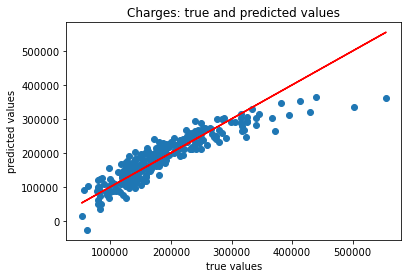

Mean absolute error of the prediction is: 23945.000077150566
Mean squared error of the prediction is: 1065224366.9198145
Root mean squared error of the prediction is: 32637.77515272471
Mean absolute percentage error of the prediction is: 14.578003791444699


In [13]:
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Çizilen grafiğe göre genel olarak çizgi üzerinde devam etsede tüm grafikte doğru saptayamadığı değerler gözlemlenmektedir. Özellikle yüksek değerlerde bir standart tutturamadığı görülmektedir.


-Try to improve your model in terms of prediction performance by adding or removing some variables.


In [14]:
Y = housePrices["SalePrice"]

X = housePrices[["GarageCars",
                 "Kitchen_Qual","GrLivArea","LotArea","OverallQual","1stFlrSF"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     602.7
Date:                Sun, 20 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:02:38   Log-Likelihood:                -13534.
No. Observations:                1129   AIC:                         2.708e+04
Df Residuals:                    1122   BIC:                         2.712e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.215e+05   5660.632    -21.472      0.000   -1.33e+05    -1.1e+05
GarageCars    1.585e+04   2058.143      7.699      0.000    1.18e+04    1.99e+04
Kitchen_Qual  2.148e+04   2405.620      8.931      0.000    1.68e+04    2.62e+04
GrLivArea       38.7956      2.969     13.067      0.000      32.970      44.621
LotArea          0.6281      0.112      5.589      0.000       0.408       0.849
OverallQual   2.029e+04   1379.536     14.709      0.000    1.76e+04     2.3e+04
1stFlrSF        27.0809      3.922      6.905      0.000      19.386      34.776
==============================================================================
Omnibus:                      321.467   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29840.521
Skew:                          -0.096   Prob(JB):                         0.00
Kurtosis:                      28.185   Cond. No.                     7.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

P değeri 0.05 ten büyük olan özellikler çıkarılıp açıklamayı arttırmak amacıyla 1stFlrSF özelliği eklenmiştir.

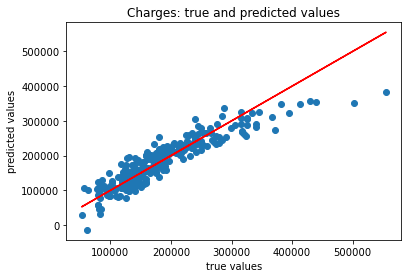

Mean absolute error of the prediction is: 23038.455970693518
Mean squared error of the prediction is: 964637721.6135038
Root mean squared error of the prediction is: 31058.617509694534
Mean absolute percentage error of the prediction is: 14.058397544332601


In [15]:
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Metrikleri karşılaştırdığımız metriklerin azaldığı görülmektedir. Bu da istenen bir sonuçtur.